In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Jyotiranjan padhi\Desktop\data folder\weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df1=df[['Gender','Height']]

In [6]:
df1

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


Text(0, 0.5, 'No of records')

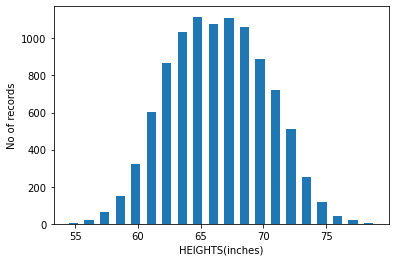

In [9]:
plt.hist(df1['Height'],bins=20,rwidth=0.6)
plt.xlabel("HEIGHTS(inches)")
plt.ylabel("No of records")

# Ploting of bell curve 

In [10]:
df1['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

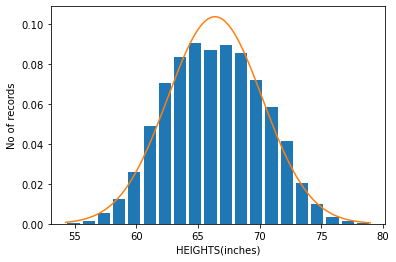

In [11]:
import numpy as np
from scipy.stats import norm
plt.hist(df['Height'],bins=20,rwidth=0.8,density=True)
plt.xlabel("HEIGHTS(inches)")
plt.ylabel("No of records")
range1 = np.arange(df['Height'].min(),df['Height'].max(),0.1)
plt.plot(range1, norm.pdf(range1,df['Height'].mean(),df['Height'].std()))

In [12]:
upper_limit=df1['Height'].mean()+3*df1['Height'].std()
upper_limit

77.91014411714076

In [13]:
lower_limit=df1['Height'].mean()-3*df1['Height'].std()
lower_limit

54.82497539250136

In [14]:
df1[(df1['Height']>upper_limit) | (df1['Height']<lower_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [15]:
df_without_outliers=df1[(df['Height']<upper_limit) & (df1['Height']>lower_limit)]
df_without_outliers

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [ ]:
# This is manual way to remove the outliers by using std() and mean()

# Now remove outliers using z score. Use z score of 3 as your thresold

In [18]:
df2=df[['Gender','Weight']]
df2

,Gender,Weight
0,Male,241.893563
1,Male,162.310473
2,Male,212.740856
3,Male,220.042470
4,Male,206.349801
...,...,...
9995,Female,136.777454
9996,Female,170.867906
9997,Female,128.475319
9998,Female,163.852461


Text(0, 0.5, 'no of counts')

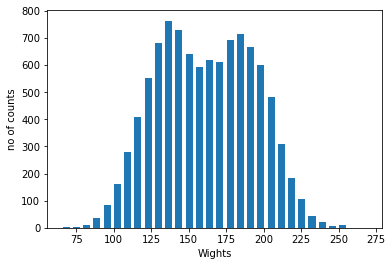

In [20]:
plt.hist(df['Weight'],bins=30,rwidth=0.7)
plt.xlabel("Wights")
plt.ylabel("no of counts")

In [21]:
df2['Z_score']=(df2['Weight']-df2['Weight'].mean())/df2['Weight'].std()

In [22]:
df2

,Gender,Weight,Z_score
0,Male,241.893563,2.505672
1,Male,162.310473,0.027099
2,Male,212.740856,1.597726
3,Male,220.042470,1.825131
4,Male,206.349801,1.398680
...,...,...,...
9995,Female,136.777454,-0.768113
9996,Female,170.867906,0.293616
9997,Female,128.475319,-1.026678
9998,Female,163.852461,0.075124


In [24]:
df2[(df2['Z_score'] > 3) | (df2['Z_score'] < -3)]

,Gender,Weight,Z_score
2014,Male,269.989699,3.380711
9285,Female,64.700127,-3.012922


In [27]:
df2_without_outliers= df2[(df2['Z_score'] < 3) & (df2['Z_score'] > -3)]

In [28]:
df2_without_outliers

,Gender,Weight,Z_score
0,Male,241.893563,2.505672
1,Male,162.310473,0.027099
2,Male,212.740856,1.597726
3,Male,220.042470,1.825131
4,Male,206.349801,1.398680
...,...,...,...
9995,Female,136.777454,-0.768113
9996,Female,170.867906,0.293616
9997,Female,128.475319,-1.026678
9998,Female,163.852461,0.075124
